<a href="https://colab.research.google.com/github/kamala2dt/kamala2dt/blob/main/Covid19_NZ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import neccessary package

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [50]:
df = pd.read_csv('https://raw.githubusercontent.com/minhealthnz/nz-covid-data/main/cases/covid-cases.csv', dtype=str)

In [51]:
df.head()

,Report Date,Case Status,Sex,Age group,DHB,Overseas travel,Historical
0,2022-04-23,Confirmed,Female,30 to 39,Canterbury,Unknown,NaN
1,2022-04-23,Confirmed,Female,10 to 19,Auckland,Unknown,NaN
2,2022-04-23,Confirmed,Female,10 to 19,Southern,Unknown,NaN
3,2022-04-23,Confirmed,Male,10 to 19,Auckland,Unknown,NaN
4,2022-04-23,Confirmed,Male,20 to 29,Auckland,Unknown,NaN


In [52]:
df['Case Status'].unique().tolist()

['Confirmed', 'Probable']

In [53]:
df['Sex'].unique().tolist()

['Female', 'Male', 'Unknown', 'Indeterminate']

In [54]:
df['Age group'].unique().tolist()

['30 to 39',
 '10 to 19',
 '20 to 29',
 '40 to 49',
 '0 to 9',
 '50 to 59',
 '70 to 79',
 '90+',
 '80 to 89',
 '60 to 69',
 'Unknown']

In [58]:
df['DHB'].unique().tolist()

['Canterbury',
 'Auckland',
 'Southern',
 'Waikato',
 'Whanganui',
 'Lakes',
 'Counties Manukau',
 'Hutt Valley',
 'Northland',
 'MidCentral',
 'Bay of Plenty',
 'Nelson Marlborough',
 'Taranaki',
 "Hawke's Bay",
 'South Canterbury',
 'Wairarapa',
 'Waitemata',
 'Managed Isolation & Quarantine',
 'Capital and Coast',
 'Tairawhiti',
 'West Coast',
 'Unknown']

In [59]:
df = df.drop('Overseas travel', 1)
df = df.drop('Historical', 1)

In [60]:
df = df[df['Case Status'] != 'Probable']
df = df[df['Sex'] != 'Unknown']
df = df[df['Sex'] != 'Indeterminate']
df = df[df['Age group'] != 'Unknown']
df = df[df['DHB'] != 'Unknown']


In [61]:
df['Report Date'] = pd.to_datetime(df['Report Date'], format='%Y-%m-%d')

In [62]:
df = df[df['Report Date'] >= '2022-01-01']

In [63]:
df_num_cases_by_date = df.groupby('Report Date')['Report Date'].count()
df_num_cases_by_date = df_num_cases_by_date.reset_index(name = 'Cases')
df_num_cases_by_date

,Report Date,Cases
0,2022-01-01,65
1,2022-01-02,53
2,2022-01-03,48
3,2022-01-04,44
4,2022-01-05,58
...,...,...
108,2022-04-19,11181
109,2022-04-20,10197
110,2022-04-21,9310
111,2022-04-22,7886


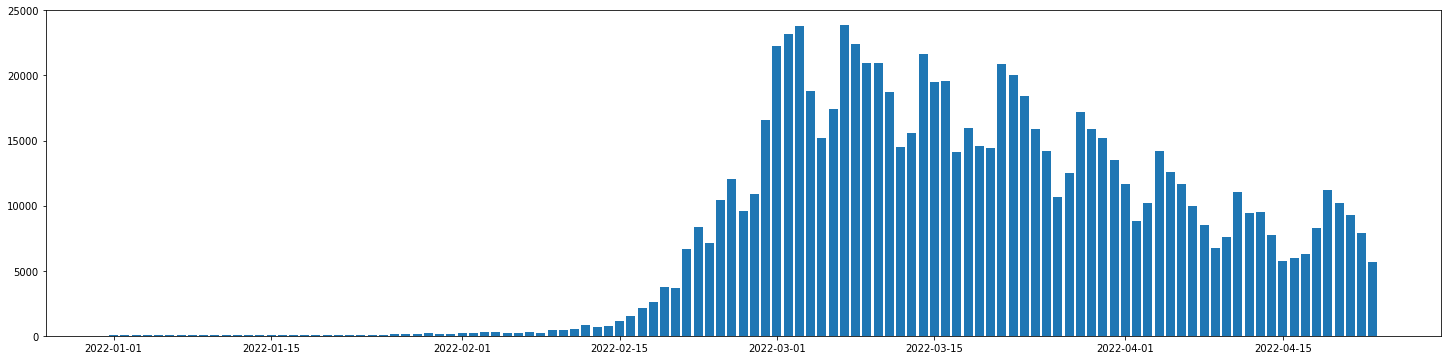

In [65]:
fig, ax = plt.subplots(figsize=(25,6))

plt.bar(df_num_cases_by_date['Report Date'], df_num_cases_by_date['Cases'])
plt.show()

In [68]:
df_num_cases_by_dhb = df.groupby('DHB')['DHB'].count()
df_num_cases_by_dhb

DHB
Auckland                           79582
Bay of Plenty                      48817
Canterbury                        104600
Capital and Coast                  55923
Counties Manukau                  117296
Hawke's Bay                        32630
Hutt Valley                        30581
Lakes                              20790
Managed Isolation & Quarantine      3409
MidCentral                         31546
Nelson Marlborough                 22820
Northland                          29398
South Canterbury                   10164
Southern                           59423
Tairawhiti                         10698
Taranaki                           22783
Waikato                            76504
Wairarapa                           7840
Waitemata                          86740
West Coast                          3185
Whanganui                          11563
Name: DHB, dtype: int64

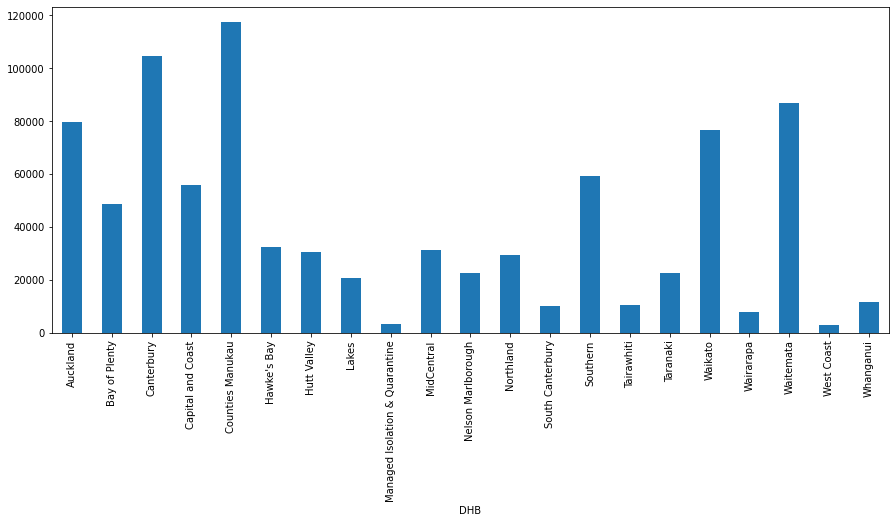

In [71]:
fig, ax = plt.subplots(figsize=(15,6))
df_num_cases_by_dhb.plot(kind='bar', ax=ax)
plt.show()


In [72]:
df['Is AKL DHB'] = np.where(df['DHB'] == 'Auckland', True, False)
df.head()

,Report Date,Case Status,Sex,Age group,DHB,Is AKL DHB
0,2022-04-23,Confirmed,Female,30 to 39,Canterbury,False
1,2022-04-23,Confirmed,Female,10 to 19,Auckland,True
2,2022-04-23,Confirmed,Female,10 to 19,Southern,False
3,2022-04-23,Confirmed,Male,10 to 19,Auckland,True
4,2022-04-23,Confirmed,Male,20 to 29,Auckland,True


In [73]:
df_by_AKL = df.groupby(['Report Date', 'Is AKL DHB']).size()
df_by_AKL = df_by_AKL.reset_index(name = 'Cases')
df_by_AKL.head()

,Report Date,Is AKL DHB,Cases
0,2022-01-01,False,54
1,2022-01-01,True,11
2,2022-01-02,False,50
3,2022-01-02,True,3
4,2022-01-03,False,46


In [74]:
df_AKL = df_by_AKL[df_by_AKL['Is AKL DHB'] >= True]
df_AKL = df_AKL.rename(columns={'Cases': 'Cases AKL'})
df_AKL = df_AKL.drop('Is AKL DHB', 1)
df_AKL.head()

,Report Date,Cases AKL
1,2022-01-01,11
3,2022-01-02,3
5,2022-01-03,2
7,2022-01-04,4
9,2022-01-05,1


In [75]:
df_nonAKL = df_by_AKL[df_by_AKL['Is AKL DHB'] >= False]
df_nonAKL = df_nonAKL.rename(columns={'Cases': 'Cases non AKL'})
df_nonAKL = df_nonAKL.drop('Is AKL DHB', 1)
df_nonAKL.head()

,Report Date,Cases non AKL
0,2022-01-01,54
1,2022-01-01,11
2,2022-01-02,50
3,2022-01-02,3
4,2022-01-03,46


In [76]:
df_by_AKL_merge = pd.merge(df_AKL, df_nonAKL, on="Report Date")
df_by_AKL_merge.head()

,Report Date,Cases AKL,Cases non AKL
0,2022-01-01,11,54
1,2022-01-01,11,11
2,2022-01-02,3,50
3,2022-01-02,3,3
4,2022-01-03,2,46


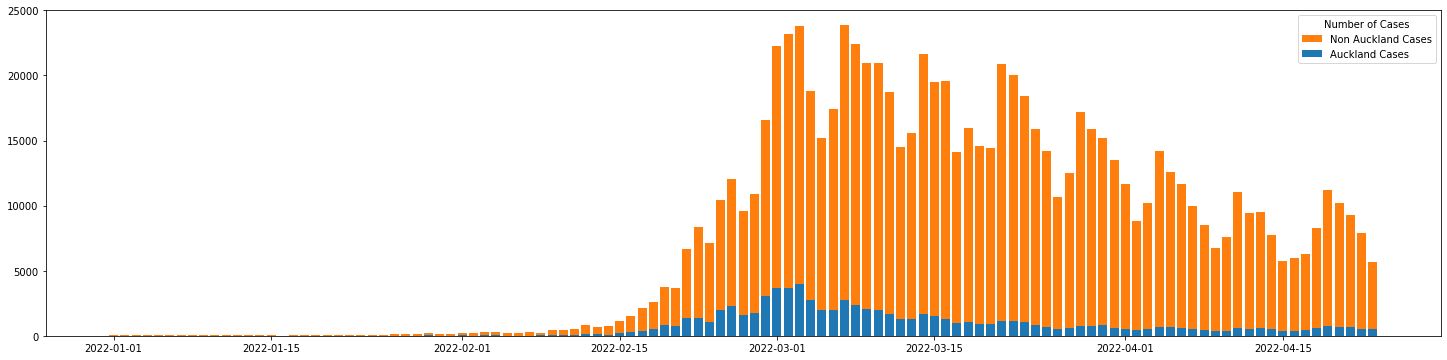

In [77]:
fig, ax = plt.subplots(figsize=(25,6))

plot_AKL = plt.bar(df_by_AKL_merge['Report Date'], df_by_AKL_merge['Cases AKL'])
plot_non_AKL = plt.bar(df_by_AKL_merge['Report Date'], df_by_AKL_merge['Cases non AKL'], bottom=df_by_AKL_merge['Cases AKL'])
plt.legend([plot_non_AKL, plot_AKL], ['Non Auckland Cases', 'Auckland Cases'], title="Number of Cases", loc="upper right")
plt.show()

Import to csv

In [78]:
df_by_AKL_merge.to_csv('df_by_AKL.csv', index=False)